In [1]:
import pandas as pd



dataset = pd.read_csv('iris.csv') 



dataset.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [2]:
dataset.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] # give the table the correct columns
dataset.dropna(how="all", inplace=True) # drops the empty line at file-end

dataset.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
# split data table into data X and class labels y
X = dataset.iloc[:,0:4].values # the measurement 
y = dataset.iloc[:,4].values # are the names of the labels (the kind of species)

print(y)
#Our iris dataset is now stored in form of a 150×4 matrix where the columns are the different features, 
#and every row represents a separate flower sample. Each sample row x can be pictured as a 4-dimensional vector

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

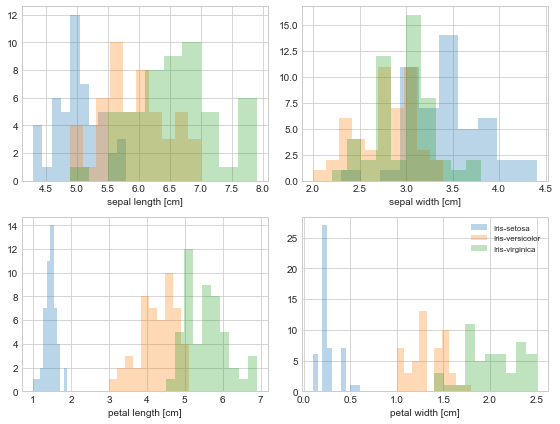

In [4]:
#exploratroy visualization

from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [5]:
#standardizing which means that the mean=0 and the variance=1.
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X) #standardizing of all the measurements X
X_std

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

In [6]:
#The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the “core” of a PCA: 
#The eigenvectors (principal components) determine the directions of the new feature space, 
#and the eigenvalues determine their magnitude. 
#In other words, the eigenvalues explain the variance of the data along the new feature axes.

#manier 1
#covariance matrix wat is de onderliggende wiskunde?
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [7]:
#faster way
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [8]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues 
[ 2.92442837  0.93215233  0.14946373  0.02098259]


In [9]:
#manier 2
#with the correlation matrix instead of the covariance matrix
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1) #eigenvalues and eigenvectoren berekenen

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

Eigenvalues 
[ 2.90480133  0.92589627  0.14846062  0.02084177]


In [10]:
#manier 3 
#SVD
u,s,v = np.linalg.svd(X_std.T)
print(s)


[ 20.80421589  11.74557554   4.70325768   1.76222125]


In [11]:
#selecting principal components

#In order to decide which eigenvector(s) can dropped without losing too much information for the construction 
#of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: 
#The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; 
#those are the ones can be dropped.
#In order to do so, the common approach is to rank the eigenvalues from highest to lowest in order choose the top k eigenvectors.


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.90480133308
0.925896274346
0.148460622583
0.020841769994


In [12]:
#After sorting the eigenpairs, the next question is 
#“how many principal components are we going to choose for our new feature subspace?” 
#A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. 
#The explained variance tells us how much information (variance) can be attributed to each of the principal components.

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

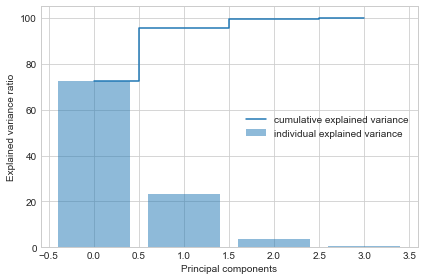

In [13]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [14]:
# from the plots you can seen that the first principal components 72% of all the information 
#and the second principal component 23 %. 
#together they contain 95% of all the information

In [15]:
#projection matrix
#It’s about time to get to the really interesting part: 
#The construction of the projection matrix that will be used to transform the Iris data onto the new feature subspace. Although, 
#the name “projection matrix” has a nice ring to it, it is basically just a matrix of our concatenated top k eigenvectors.

#in this example the 4-dimensional feature space will be reduced to a 2-dimensional feature subspace, by choosing the 
#2 eigenvectoren with the highest eigenvalues. in this wat you construct projection matrix W wiht dxk dimension 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [16]:
matrixW = pd.DataFrame(matrix_w, index=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'])
matrixW.columns=['PC1', 'PC2']
#matrixW.set_index=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
matrixW

,PC1,PC2
sepal_len,0.523085,-0.369570
sepal_wid,-0.259569,-0.926812
petal_len,0.581843,-0.019128
petal_wid,0.566096,-0.063816


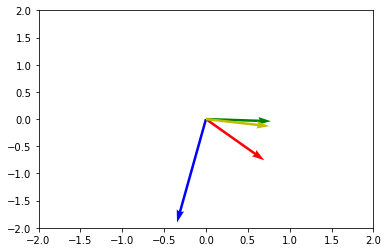

In [17]:
import matplotlib.pyplot as plt

#V = np.array([[1,1],[-2,2],[4,-7]])
#origin = [0], [0] # origin point
#plt.figure(figsize=(6, 4))

plt.quiver(0,0,matrix_w[:,0], matrix_w[:,1], color=['r','b','g','y'], scale=3)
plt.axis([-2,2,-2,2])
plt.show()

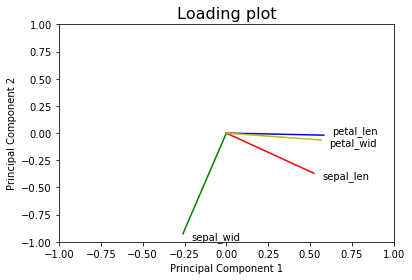

In [32]:
#plt.figure(figsize=(6, 4))
A = np.array([[0, 0],[0.523085, -0.369570]])
B = np.array([[0, 0],[-0.259569, -0.926812]])
C = np.array([[0, 0],[0.581843, -0.019128]])
D = np.array([[0, 0],[0.566096, -0.063816]])
plt.plot(A[:,0],A[:,1],'r')
plt.plot(B[:,0],B[:,1],'g', C[:,0],C[:,1],'b', D[:,0],D[:,1],'y')
#plt.plot(matrix_w[0,:], matrix_w[1,:])
plt.axis([-1,1,-1,1])
plt.text(matrix_w[0,0]+0.05, matrix_w[0,1]-0.05,'sepal_len')
plt.text(matrix_w[1,0]+0.05, matrix_w[1,1]-0.05,'sepal_wid')
plt.text(matrix_w[2,0]+0.05, matrix_w[2,1]+0.02,'petal_len')
plt.text(matrix_w[3,0]+0.05, matrix_w[3,1]-0.05,'petal_wid')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Loading plot", size=16)
plt.show()
plt.savefig('aaa.png')

In [19]:
# the last is about this equatation: Y = X x W

Y = X_std.dot(matrix_w)
#print (Y)
print(len(Y))
Y


149


array([[-2.10795032,  0.64427554],
       [-2.38797131,  0.30583307],
       [-2.32487909,  0.56292316],
       [-2.40508635, -0.687591  ],
       [-2.08320351, -1.53025171],
       [-2.4636848 , -0.08795413],
       [-2.25174963, -0.25964365],
       [-2.3645813 ,  1.08255676],
       [-2.20946338,  0.43707676],
       [-2.17862017, -1.08221046],
       [-2.34525657, -0.17122946],
       [-2.24590315,  0.6974389 ],
       [-2.66214582,  0.92447316],
       [-2.2050227 , -1.90150522],
       [-2.25993023, -2.73492274],
       [-2.21591283, -1.52588897],
       [-2.20705382, -0.52623535],
       [-1.9077081 , -1.4415791 ],
       [-2.35411558, -1.17088308],
       [-1.93202643, -0.44083479],
       [-2.21942518, -0.96477499],
       [-2.79116421, -0.50421849],
       [-1.83814105, -0.11729122],
       [-2.24572458, -0.17450151],
       [-1.97825353,  0.59734172],
       [-2.06935091, -0.27755619],
       [-2.18514506, -0.56366755],
       [-2.15824269, -0.34805785],
       [-2.28843932,

In [20]:
Y[y==lab, 1]

array([-0.86943848,  0.70171953, -0.54916658,  0.05187679, -0.28797217,
       -0.78056359,  1.5568955 , -0.40328242,  0.72876171, -1.91685818,
       -0.69255356,  0.43102351, -0.41054652,  1.16818977,  0.4451459 ,
       -0.67521526, -0.25105642, -2.55096977,  0.01266612,  1.71954411,
       -0.90334021,  0.57047585, -0.38895776,  0.48854962, -1.01153249,
       -0.99881497,  0.31987373, -0.06550254,  0.19641059, -0.55077372,
       -0.2397454 , -2.62038074,  0.18799967,  0.29708201,  0.81858241,
       -0.83668445, -1.07118383, -0.420823  , -0.01965942, -0.66872729,
       -0.60663655, -0.68227708,  0.70171953, -0.86076914, -1.04517619,
       -0.37934387,  0.90808604, -0.26460621, -1.01583909,  0.02182097])

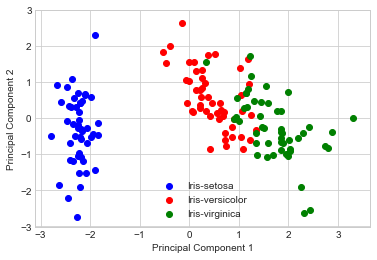

In [33]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    #plt.tight_layout()
    plt.show()
    
    

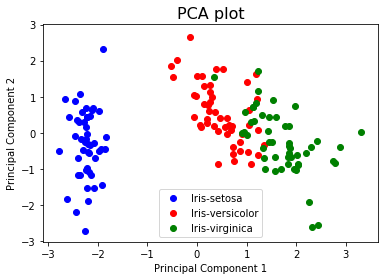

In [35]:
#plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),('blue', 'red', 'green')):
    plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot',size=16)
plt.legend(loc='lower center')
#plt.tight_layout()
plt.show()
    

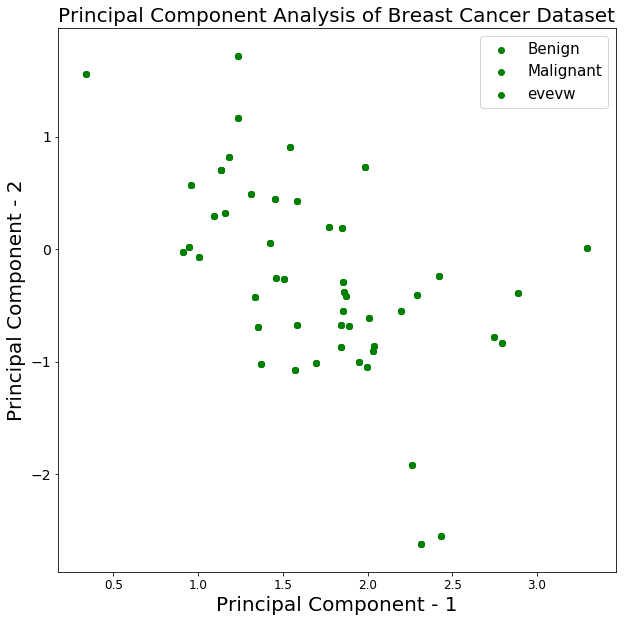

In [23]:
from matplotlib import pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant','evevw']
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['class'] == target
    plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)

plt.legend(targets,prop={'size': 15})
plt.show()